In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [311]:
house_df = pd.read_csv('/home/cacaprog/learning-projects/ml-zoomcamp/data/house_df.csv')

In [312]:
house_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


Let's find out how selecting the seed influences our score.

In [313]:
df = house_df.copy()

n = len(df)
 
n_train = int(n * 0.6)
n_test = int(n * 0.2)
n_val = int(n - (n_train + n_test))

score = []
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seed:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

# Split the dataset
    df_train = df.iloc[idx[:n_train]].copy().reset_index(drop=True)
    df_val = df.iloc[idx[n_train: n_train + n_val]].copy().reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].copy().reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = df_train.fillna(0)
    
    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])
    
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)
    
    # return the base price and the full price for the house
        return w_full[0], w_full[1:]
    
    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)

    def rmse(y, y_pred):
        se = (y - y_pred) ** 2 # squared error
        mse = se.mean() # mean of squared error
        return round(np.sqrt(mse), 2) # root of the mean squared error

    score.append(rmse(y_train, y_pred))

    

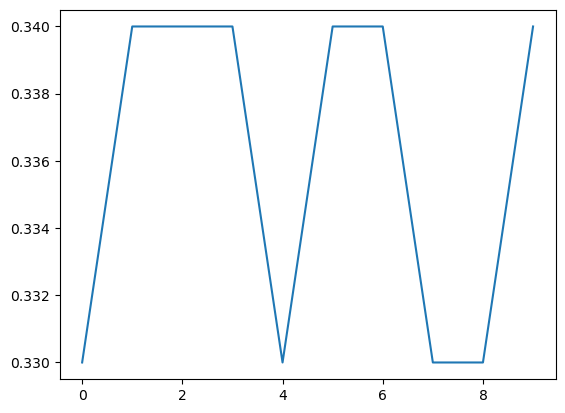

In [314]:
plt.plot(score)

In [315]:
score

[0.33, 0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.33, 0.33, 0.34]

In [316]:
std_of_score = np.std(score)
round(std_of_score, 3)

0.005

**Regularization**

In [330]:
def split_dataset(df, seed):
    df = house_df.copy()
    
    n = len(df)
    n_train = int(n * 0.8)
    n_test = n - n_train

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

# Split the dataset
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train:]].reset_index(drop=True)

# Extract the target variable and apply log transformation
    y_train = np.log1p(df_train['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    # Remove the target variable from the features
    df_train.drop(columns=['median_house_value'], inplace=True)
    df_test.drop(columns=['median_house_value'], inplace=True)

    # Fill missing values in the features with 0
    X_train = df_train.fillna(0)
    X_test = df_test.fillna(0)

    return X_train, X_test, y_train, y_test

In [331]:
X_train, X_test, y_train, y_test = split_dataset(house_df, 9)

In [332]:
X_train.shape

(12549, 8)

In [333]:
X_test.shape

(3138, 8)

In [334]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # return the base price and the full price for the house
    return w_full[0], w_full[1:]

In [335]:
w0, w = train_linear_regression_reg(X_train, y_train, 0.001)

In [336]:
def rmse(y):
    y_pred = w0 + X_train.dot(w)
    se = (y - y_pred) ** 2 # squared error
    mse = se.mean() # mean of squared error
    return round(np.sqrt(mse), 2) # root of the mean squared error

In [337]:
rmse(y_train)

0.34